In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib notebook

# Plotting

We use matplotlib as a plotting library. better to say the pyplot syntax from matplotlib. There are many other libraries that are specially designed for special tasks. e.g. seaborn for statistical plotting. <br>
<br>
import matplotlib.pyplot as plt <br>
<br>
finally we can select a so call [Matplotlib backends](https://matplotlib.org/tutorials/introductory/usage.html#backends)
there are several classical available. The most useable are "inline","notebook" and "qt". 
inline is a passive one that is best to generate plots that are int he notebook. Both notebook and qt are interactive. The qt is detached from the window while notebook is  bind in. you choose them by typing
%matplotlib notebook

in may cases changing the backend requires the restart of the Kernel.


In [ ]:
#standard matplab type plotting
plt.plot(np.arange(-5,5,0.01),np.sin(2*np.pi*np.arange(-5,5,0.01)))
plt.xlim((-4,4)) # the order matters!
plt.show()  # needed as we do not plot interactive

In [3]:
plt.ion()  #turn on interactives plotting (plots are updated as you change things)

So a plot has a Frame = Figure = The window 
and what is plotted on it = the axis.

### All of this was matlab type plotting. Which means we plot without thinking what and where we plot

But what does a plot consist of?
<div>
<img src="http://www.jensuhlig.de/Kemm30/KEMM30_006.png" width="600">
</div>

### Matlab style plotting $\leftrightarrow $ Object style plotting, why make it more complicate?
our convention: we use matlab type plotting for quick convenience and the object type for everything else

First we create a figure:

<IPython.core.display.Javascript object>


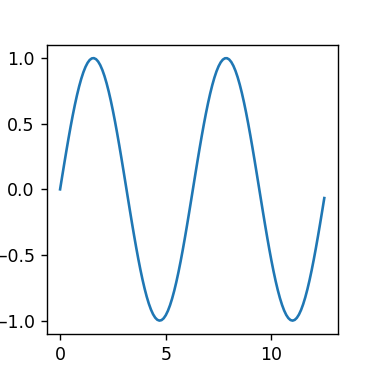

In [7]:
fig=plt.figure(figsize=(3,3)) #create a frame
ax=fig.add_subplot() # create a sheet to draw on
x=np.arange(0,4*np.pi,0.1)
ax.plot(x,np.sin(x))

then we add an axis (the frame where the plot lives in)

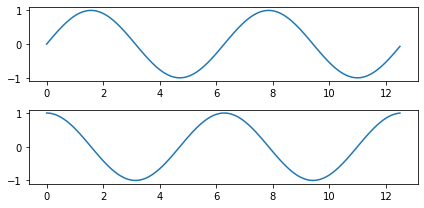

In [20]:
%matplotlib inline
fig1=plt.figure(figsize=(6,3))
ax1=fig1.add_subplot(2,1,1)  #add_subplot(nrows, ncols, index)
ax2=fig1.add_subplot(2,1,2)  #add_second axes
x=np.arange(0,4*np.pi,0.1)
y=np.sin(x)
ax1.plot(x,y)
ax2.plot(x,np.cos(x))
fig1.tight_layout()

usually one can combine both in a single convenient line.

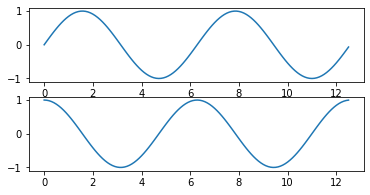

In [26]:
fig2,(ax1,ax2)=plt.subplots(2,1,figsize=(6,3)) #single axis
x=np.arange(0,4*np.pi,0.1)
ax1.plot(x,np.sin(x))
ax2.plot(x,np.cos(x))
fig1.tight_layout()

please note that we use here (ax1,ax2) to "unpack" the return of the subplots function if you instead use a single object then this will be a vector

the shape is
(3,)


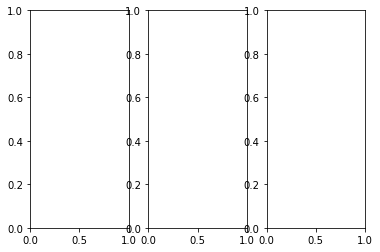

In [31]:
fig3,ax_vector=plt.subplots(2,3) # does the same as above and is what I use for most of my plots
print('the shape is')
print(ax_vector.shape)
print(type(ax_vector))

while this also works and can be sometimes usefull (because one can use e.g. a loop to iterate over the plots) then accessing a single axis via  ax_vector[1,1] but doe snot allow the completion (using the tab key) <br>
## Task

create a figure with shape 6inch  wide x3 inch high. 
make two plots inside it beside each other. plot the sine function in one in red and the cosine in green in the second.<br> use the function "tight_layout" on the figure and save it to disk as png using "save_fig"

fig3.savefig('save_my_figure.png') #writes the result to disk in various formats (png, pdf, svg, ...) 

### Axis and Ticks

adjusting the ticks and axis is often one of the main tasks
Adjusting the fonts can be done per item, but often setting the general fonts is more efficient and what is actually wanted

In [32]:
#here a way to make the general fonts bigger (until you change it back)
import matplotlib
font = {'family' : 'Arial Unicode MS',
    'weight' : 'bold',
    'size'   : 12}
matplotlib.rc('font', **font)

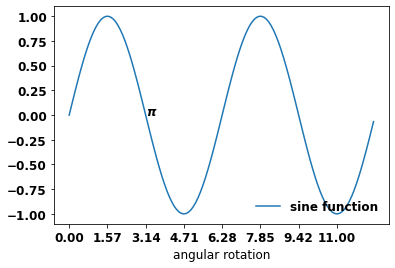

In [41]:
fig,ax=plt.subplots()
x=np.arange(0,4*np.pi,0.1)
ax.plot(x,np.sin(x),label='sine function')
#set ticks manual
ax.set_xticks(np.arange(0,4,0.5)*np.pi)
#set ticks manual
a=ax.get_xticks()                          # get the values of the ticks
ax.set_xticklabels(['%.2f'%b for b in a])  #the labels are text! so all text replacement 
                                           # works and we can shape the text as we want
#set axis label
ax.set_xlabel('angular rotation')    

#legend
leg=ax.legend(frameon=False,loc=4)

_=ax.text(1*np.pi,0,r'$\pi$')

## Task
replace the labels of the x-ticks by the the values in pi. hint a string can be "rendered" using the Latex notation (see the example where the text pi is added below)

### cheat sheets

How should I ever remember all of this? $\rightarrow$ you get used to it or you look it up/use a cheat sheet <br>
https://python-graph-gallery.com/wp-content/uploads/Matplotlib_cheatsheet_datacamp.png      <br>
Or look in the folder Cheat cheats

## Some statistics to get interesting data for plotting

For learning how to make propper plots we start with an experiment in statistics <br>
we want to measure what is the average number of dots shown by a dice <br>
This returns a single dice throw (test it a few times to see how it changes):

In [ ]:
print(np.random.choice([1,2,3,4,5,6]))

This returns a vector with 100 dice throws:

In [ ]:
x=np.random.choice([1,2,3,4,5,6],size=(100))
print(x.shape)
print('The mean of 100 dice throws is:{}'.format(x.mean()))

and this will create a matrix with 1000x 100 dice throws in x
and then we calculate for y the mean for each of the 1000 set of 100 throws.

In [ ]:
x=np.random.choice([1,2,3,4,5,6],size=(100,1000))
print(x.shape)
y=x.mean(axis=0)
print(y.shape)

### Tasks 

* use fontsize 18 and make a figure with 14x14 inch size using the pre handle option from above
* use subplots to make two horizontal plots over the whole width.

* read what np.histogram does, The function returns the "edges" of the bins and the counts in each bin. Why are they of different length? Classically one takes the middle of the bins to create  nice plot with <br>
middle_bins=(bins[:-1]+bins[1:])/2<br>
* create a vector that contains the bins from 0 to 7 in 0.05 steps, calculate the histrogram and catch its two output vectors
* plot the histogram using a bar plot with grey bars in the second axis. 

* plot in the second axis a gaussian function with mu=y.mean() of all experiments, and is sigma=standard_deviation(with ddof=1) of all experiments. and multiply the gaussian with 50. Why does this match so well?
* label all the x- and y scales 
* change the x-axis from 2.5 to 4.5
* format the x-axis ticks to have precisely 2 after comma digits
* format the y-axis in scientific notation (using exponents)
* make a legend in the upper left corner. in the legend write the entries and colors you plotted
* find a way to add extra text to the legend and write the parameters of the gaussian curve into the plot (not the legend!)

In [ ]:
font = {'family' : 'Arial Unicode MS',
    'weight' : 'bold',
    'size'   : 16}
matplotlib.rc('font', **font)

The final figure will look like this, we have plotted the first half for now
<div>
<img src="http://www.jensuhlig.de/Kemm30/first_half.png" width="600">
</div>

* Add a scatterplot into the second axis where each experiment of 100 throws is a single point. <br>
The x-coordinate is the mean of the 100 throws = y. <br>
The y-coordinate is for each point randomly chosen between 0 and the height of the gaussian. <br>
np.random.rand() gives [0-1). if you multiply it with the gaussian heigth calculated before you can achieve this effect.<br>
height=np.random.rand(np.shape(y)[0])*gauss(x=y,mu=y.mean(),sigma=y.std())
* use markersize 2 for this plot
* don't forget to label the axis and make a legend (use bbox_to_anchor to place it somewhere proper)
* Save the resulting figure as png with 250dpi and as svg for further customisation

Advanced:
* In this scatterplot, plot all points inside the one sigma environment (=1/2 std diviation) of the mean in blue and all outside in red.
* hint: you can externally create a "slicing vector" by e.g. a=x>5 and combine multiple of thos with e.g np.all
* write in the legend in addition to the colour the total number of counts in each group. (hint, use sum on t

The final figure will look like this
<div>
<img src="http://www.jensuhlig.de/Kemm30/second_half.png" width="600">
</div>

If I throw a dice 100 times then in 68% of all cases the "real value" will be within the standard diviation of the data assuming that the data is normal distributed (like most measurements) often this is used as "error" of the measurement. for large number of discrete throws of dices this works, because of the:
https://en.wikipedia.org/wiki/Central_limit_theorem

We speak about the experiment (discrete value) and the model (the gaussian or normal distributed data). So the discrete model in fact says: If I throw my dice 100 times I will most likely get something around 350 as the sum of these throws and with 68% probability my result will lay within $350\pm 15$.

Looking into this webpage you will find that this spread of the data can be estimated by the variance of the experiment.
Remember the standard deviation was defined as $\sqrt{\frac{\sum_n{x_i - \bar x}^2}{n-1}}$ carefully, there are two $\sqrt{\frac{\sum_n{x_i - \bar x}^2}{n}}$

As a wild guess, the average is somewhere in the middle, so $\frac{1+6}{2}=3.5$ is the mean and $2.5^2 + 2.5^2$ the total width. Or 

$\bar x \pm std(x)/2$ 

is your confidence interval

Important to remember: the variance is the 65% environment. To be more sure people often use the "two sigma environment" which then contains 98%

## Error bar plotting

In [ ]:
url="http://www.jensuhlig.de/Kemm30/data_with_error.csv"
data=pd.read_csv(url,sep='\t',index_col=0)
data.head()

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(16,4))
x=data.index
y=data.iloc[:,0]
yerr=data.iloc[:,1]
ax[0].errorbar(x=x,y=y,yerr=yerr,fmt='o',capsize=3)
ax[1].plot(x, y,color='black')
ax[1].fill_between(x,y-yerr,y+yerr,facecolor='grey',edgecolor='face',alpha=0.5)
ax[0].set_xlabel('time[s]');ax[1].set_xlabel('time[s]')
ax[0].set_ylabel(r'log($1-\frac{Abs}{Abs_{inf}}$)');ax[1].set_ylabel(r'log($1-\frac{Abs}{Abs_{inf}}$)')

### Task:
In the dice throws above we could draw a gaussian function over the histogram of the dice throws. For each point we are actually uncertain about where it actually is. classically one uses a poisson estimator to evaluate how certain we are about the intensity at this point. So for each point of gaus(x) we can use $\sqrt{gauss(x)}$ as an error bar. <br>
Replace the gauss curve in the plot above with a point by point calculation using error bars

# Advanced

## combined matlab type plotting and object type plotting

There is a way to go from one type of plotting to the other by first getting a handle to the figure with <br>
fig=plt.gcf() #get current figure <br>
Then get a handle to all the axes <br>
ax=fig.get_axes() #get all axes <br>
If the figure only contains a single axes one can do this<br>
ax=plt.gca() #get current axis

Anyhow it is very confusing to combine both ways of plotting. So for any serious plotting use the object type plotting from the beginning!

## 2D plotting

2d plotting (as 3d plotting) means that you have to create coordinate information for each point of you matrix. so the first point need (1,1,z(1,1)) and so on. There are many ways how to do this, but np.meshgrid is a usual and fast way. Observe the difference between pcolormesh and imshow. The point is that a mesh is more than an image. It really has an axis that can be distorted.

In [ ]:
#lets plot a gaussian in 2d
x=np.arange(-5,5,0.1)
X,Y=np.meshgrid(x,x)
def gauss2d(X,Y,mu=(0,0),sigma=(1,1)):
    scale=(sigma[0]+sigma[1])*(2*np.pi)
    expo=(X-mu[0])**2/(-2*sigma[0]**2)+(Y-mu[1])**2/(-2*sigma[1]**2)
    return np.e**expo/scale
Z=gauss2d(X,Y)

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(16,4))
ax[0].imshow(Z)
ax[1].pcolormesh(X,Y,Z,cmap='viridis')
ax[2].pcolor(X,Y,Z,cmap='viridis')

### Task
create a sinodual wave. In the x-dimension the function follows a sinus. In y-dimension it follows a gaussian.
Hint: check np.tile and np.outer for help
plot this wave in 2d in a suitable region

Advanced: There are other libraries that provide you with interactive 2d/3d plots. This is one of the useful ones.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(16,8))
ax= fig.add_subplot(projection='3d')
surf=ax.plot_surface(X,Y,Z,cmap='jet',antialiased=False)
ax.contourf(X, Y, Z, zdir='z',offset=-0.05, cmap='jet')
ax.contourf(X, Y, Z, zdir='x',offset=-5,cmap='jet')
ax.contourf(X, Y, Z, zdir='y',offset=5, cmap='jet')
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_zlim3d(-0.05,0.06)
ax.set_xlabel('x-axis',labelpad=15)
ax.set_ylabel('y-axis',labelpad=15)
ax.set_zlabel('z-axis',labelpad=15)